## Computer Vision - Licence Plate Detection and Recognition

### 0. Setup

In this notebook, we will implement a system for detecting and recognizing license plates from images using computer vision techniques.

- The requirement are register in the requirements.txt file.
- To install them, run the following command:
  
  ```bash
  pip install -r requirements.txt
  ```


"We provide the trained model weights in the 'models' directory. You can load these weights into your model for inference or further training."


### 1. Importing Libraries and Defining Helper Functions

In [8]:
import os
import cv2
import yaml
import shutil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torch.utils.data import Dataset
from PIL import Image
import torch
import sys
# print(torch.cuda.is_available())

from ultralytics import YOLO
sys.path.append("../src")

from utils import pair_split, display_image_with_bboxes

### 2. Loading Dataset and Preprocessing

#### 2.0 Define path variables

In [2]:
image_dir = "../data/images"
label_dir = "../data/labels"

#### 2.1 Define a function to pair images and labels

In [3]:
train_pairs = pair_split(image_dir+"/train", label_dir+"/train")
val_pairs   = pair_split(image_dir+"/val", label_dir+"/val")
test_pairs  = pair_split(image_dir+"/test", label_dir+"/test")

In [5]:
class PlateDataset(Dataset):
    def __init__(self, image_dir, label_dir, transform=None, yolo_to_coco=True):
        """
        yolo_to_coco: if True, converts YOLO normalized boxes to pixel COCO format
        """
        self.transform = transform
        self.pairs = pair_split(image_dir, label_dir)
        self.yolo_to_coco = yolo_to_coco

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        img_path, label_path = self.pairs[idx]

        # Load image
        img_pil = Image.open(img_path).convert("RGB")
        img_w, img_h = img_pil.size

        img = np.array(img_pil, dtype=np.float32) / 255.0
        img = torch.from_numpy(img).permute(2, 0, 1)


        labels = []
        with open(label_path, "r") as f:
            for line in f:
                line = line.strip()
                if line == "":
                    continue
                cls, xc, yc, w, h = map(float, line.split())


                x_min = (xc - w/2) * img_w
                y_min = (yc - h/2) * img_h
                width = w * img_w
                height = h * img_h
                labels.append([cls, x_min, y_min, width, height])
            
        
        labels = torch.tensor(labels, dtype=torch.float32)  # Nx5: [class, x, y, w, h]

        return img, labels


train_dataset = PlateDataset(image_dir + "/train", label_dir + "/train")
val_dataset   = PlateDataset(image_dir + "/val",   label_dir + "/val")
test_dataset  = PlateDataset(image_dir + "/test",  label_dir + "/test")

#### 2.2 Visualizing an example from the dataset

Number of objects in this image: 2


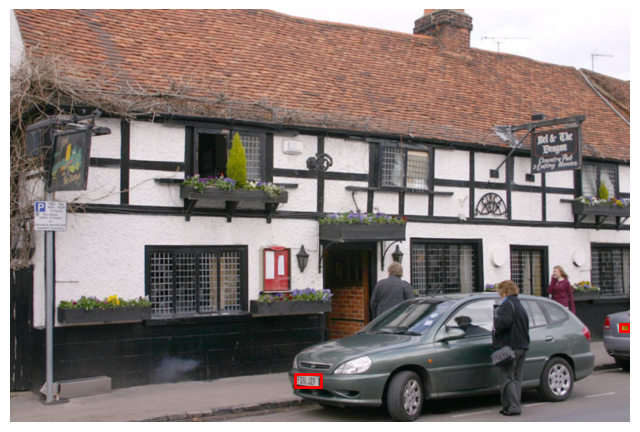

In [ ]:
# Get one sample
img, targets = train_dataset[0]  # img: Tensor [C,H,W], targets: Tensor [[x, y, w, h]]

display_image_with_bboxes(img, targets)

### 3. Model Definition

### 4. Training and Evaluation

### 5. Reading Parts